<a href="https://colab.research.google.com/github/lainey-reed/Textbook/blob/master/Colab/AC_Textbook_Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Fluid Deformaton and Energy Derivations

This Colab file contains examples from [Chapter 4 of the Aguaclara textbook](https://aguaclara.github.io/Textbook/Fluid_Deformation_and_Energy_Dissipation/FDED_Intro.html)

In [ ]:
!pip install aguaclara

     |████████████████████████████████| 102kB 3.7MB/s 
     |████████████████████████████████| 215kB 5.6MB/s 
     |████████████████████████████████| 2.1MB 7.5MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 552kB 20.8MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.10-cp37-none-any.whl size=107246 sha256=41d343c4ca38559470d1e82029990ccc7697ee1e9454289b199ff5cb64ccab13
  Stored in directory: /root/.cache/pip/wheels/ca/49/8d/cd190eac424c74d5d164af69b86bc6ab405affbaa22e22e57b
Successfully built aguaclara


## Estimates of time required for mixing processes

The following examples are all from [Chapter 4: Fluid Deormation and Energy Dissapation Derivations: Estimates of time required for mixing processes](https://aguaclara.github.io/Textbook/Fluid_Deformation_and_Energy_Dissipation/FDED_Derivations.html#estimates-of-time-required-for-mixing-processes)

### Example 1: Inner Viscous Legnth Scale vs Energy Dissapation Rate

The following example is from the section titled [Inner Viscous Length Scale](https://aguaclara.github.io/Textbook/Fluid_Deformation_and_Energy_Dissipation/FDED_Derivations.html#inner-viscous-length-scale)



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


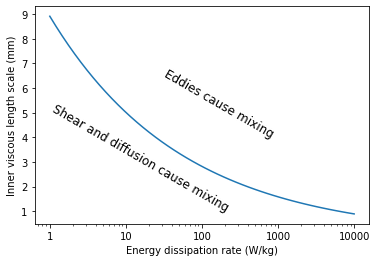

In [ ]:
from aguaclara.core.units import unit_registry as u
import aguaclara.core.utility as ut
import numpy as np
import matplotlib.pyplot as plt
import aguaclara.research.floc_model as fm

from matplotlib.ticker import FormatStrFormatter
imagepath = 'Rapid_Mix/Images/'
EDR_array = np.logspace(0,4,num=50)*u.mW/u.kg
Temperature = 20*u.degC
def Inner_viscous(EDR, Temperature):
    return fm.RATIO_KOLMOGOROV * fm.eta_kolmogorov(EDR, Temperature)

fig, ax = plt.subplots()
ax.semilogx(EDR_array.to(u.mW/u.kg),Inner_viscous(EDR_array, Temperature).to(u.mm))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.set(xlabel='Energy dissipation rate (W/kg)', ylabel='Inner viscous length scale (mm)')
ax.text(30, 4, 'Eddies cause mixing', fontsize=12,rotation=-30)
ax.text(1, 1, 'Shear and diffusion cause mixing', fontsize=12,rotation=-30)
plt.show()

### Example 2: Eddy Turnover Time v Length

The following example is from [Turbulent Mixing Time as a Function of Scale](https://aguaclara.github.io/Textbook/Fluid_Deformation_and_Energy_Dissipation/FDED_Derivations.html#turbulent-mixing-time-as-a-function-of-scale)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


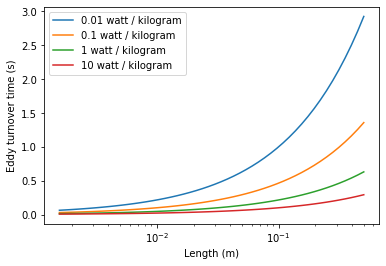

In [ ]:
from aguaclara.core.units import unit_registry as u
import aguaclara.core.utility as ut
import numpy as np
import matplotlib.pyplot as plt
import aguaclara.research.floc_model as fm
EDR_graph = np.array([0.01,0.1,1,10 ])*u.W/u.kg
"""Use the highest EDR to estimate the smallest length scale"""
Inner_viscous_graph = Inner_viscous(EDR_graph[2], Temperature)
Inner_viscous_graph
L_flow = 0.5*u.m
L_scale = np.logspace(np.log10(Inner_viscous_graph.magnitude),np.log10(L_flow.magnitude),50)
L_scale
imagepath = 'Rapid_Mix/Images/'
fig, ax = plt.subplots()
for i in range(len(EDR_graph)):
  ax.semilogx(L_scale,((L_scale**2/EDR_graph[i])**(1/3)).to_base_units())

ax.legend(EDR_graph)

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.set(xlabel='Length (m)', ylabel='Eddy turnover time (s)')
plt.show()

### Example 3: Length Scale v Velocity Gradient
The following example is from [Einstein's Diffusion Equation](https://aguaclara.github.io/Textbook/Fluid_Deformation_and_Energy_Dissipation/FDED_Derivations.html#einsteins-diffusion-equation) 

/usr/local/lib/python3.7/dist-packages/aguaclara/core/physchem.py:102: UserWarning: viscosity_dynamic is deprecated; use viscosity_dynamic_water instead.
  'viscosity_dynamic_water instead.', UserWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


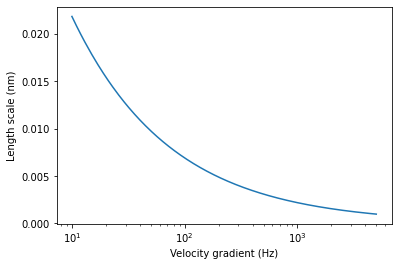

In [ ]:
import aguaclara.core.physchem as pc
import aguaclara.research.floc_model as fm
def L_Shear_Diffusion(G,Temperature,d_particle):
  return np.sqrt((u.boltzmann_constant*Temperature/
  (3 * G *  np.pi *pc.viscosity_dynamic(Temperature)* d_particle)).to_base_units())

G = np.arange(10,5000)*u.Hz
d_particle = fm.PACl.Diameter*u.m
Temperature=20*u.degC
# Changed x unit call to remove error
x = (L_Shear_Diffusion(G,Temperature,d_particle)).to(u.nm ** .5)
fig, ax = plt.subplots()
ax.semilogx(G,x)
ax.set(xlabel='Velocity gradient (Hz)', ylabel='Length scale (nm)')
plt.show()

## Maximum Velocity Gradients

The following examples are from the subchapter [Fluid Deformaton and Energy Dissapation Derivations: Maximum Velociy Gradients](https://aguaclara.github.io/Textbook/Fluid_Deformation_and_Energy_Dissipation/FDED_Derivations.html#maximum-velocity-gradients)

### Example 4: Ratio Jet Plane

This example is from the [Jet Plane](https://aguaclara.github.io/Textbook/Fluid_Deformation_and_Energy_Dissipation/FDED_Derivations.html#plane-jet) section.

In [ ]:
import aguaclara.core.constants as con
VC_BAFFLE_RATIO=con.VC_ORIFICE_RATIO**2
K_MINOR_FLOC_BAFFLE = (1/VC_BAFFLE_RATIO - 1)**2
Ratio_Jet_Plane = 2*con.VC_ORIFICE_RATIO**8 * K_MINOR_FLOC_BAFFLE/2/5
Ratio_Jet_Plane

VC_BAFFLE_RATIO**4*K_MINOR_FLOC_BAFFLE/Ratio_Jet_Plane

5.000000000000002

### Example 5: Flat Plate

This example is from the [Flat Plate](https://aguaclara.github.io/Textbook/Fluid_Deformation_and_Energy_Dissipation/FDED_Derivations.html#plane-jet) section.

In [ ]:
"""CFD analysis setup used by Ariane Walker-Horn in 2015"""
from aguaclara.core.units import unit_registry as u
EDR_Max = 0.04*u.W/u.kg
v = 1*u.m/u.s
W = 1*u.m
Ratio_Jet_Plate = (EDR_Max * W/v**3).to_base_units()
print(Ratio_Jet_Plate)

0.04 dimensionless
